# WLCM R code

### Install Packages

In [25]:
install.packages('reshape')
install.packages('CodeDepends')

package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\npourkasraei\AppData\Local\Temp\RtmpCWvmmm\downloaded_packages


Warning message:
"dependency 'graph' is not available"also installing the dependency 'XML'



package 'XML' successfully unpacked and MD5 sums checked
package 'CodeDepends' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\npourkasraei\AppData\Local\Temp\RtmpCWvmmm\downloaded_packages


In [2]:
library(dplyr)
library(MASS)
library(doBy)
library(readr)
library(ggplot2)
library(ggthemes)
library(tidyverse)
library(tidyr)
library(MASS)
library(Rserve)
require(reshape)
require(reshape2)
library(tibble)

ERROR: Error in library(doBy): there is no package called 'doBy'


#### Create distribution estimate parameter function 

In [3]:
estBetaParams <- function(mu, var) {
  alpha <- ((1 - mu) / var - 1 / mu) * mu ^ 2
  beta <- alpha * (1 / mu - 1)
  return(params = list(alpha = alpha, beta = beta))
}

#### Create find Modes Function 

In [4]:
Modes <- function(x) {
  ux <- unique(x[!is.na(x)])
  tab <- tabulate(match(x, ux))
  ux[tab == max(tab)]}


######                     Set working directory and Load Risk file

In [5]:
setwd("C:/Users/NPourkasraei/Documents/R/Working Folder/Risk")
risk.all<- read.csv(file = "Risk.csv", header = TRUE) 
population<- as_tibble(as.data.frame(read.csv(file="Population.csv",header = TRUE)))
age<- as_tibble(as.data.frame(read.csv(file="AssetAge.csv",header = TRUE)))
color<- c("darkviolet","blue4","darkorange","darkorchid","gray15","deeppink4","turquoise4","tomato4","red4","brown","orchid4","maroon4","chocolate")

######   Load top 6 row of each file

In [6]:
head(risk.all)

Asset,Risk,SME,PF.Low1,PF.High1,PF.Low,PF.High,PI.Low,PI.High,PFT.Low,PFT.High,PIT.Low,PIT.High,Type,Note
Substation Transformer,Buchholtz Relay Internal Fault,SME1,0.001,0.005,0.1,0.5,2500,2000000,0.60,0.90,3000,4000,1,NA
Substation Transformer,Buchholtz Relay Internal Fault,SME2,0.000,0.250,0.0,25.0,100,2000000,0.01,0.20,100,2000000,1,NA
Substation Transformer,Buchholtz Relay Internal Fault,SME3,0.050,0.350,5.0,35.0,2500,1500000,0.10,0.45,5000,1500000,1,NA
Substation Transformer,Buchholtz Relay Internal Fault,SME4,0.010,0.050,1.0,5.0,150,1200000,0.00,0.01,150,5000,1,NA
Substation Transformer,Buchholtz Relay Through Fault (Xfmr),SME1,0.002,0.010,0.2,1.0,5000,2000000,0.70,0.90,15000,1000000,1,NA
Substation Transformer,Buchholtz Relay Through Fault (Xfmr),SME2,0.000,0.250,0.0,25.0,100,2000000,0.00,0.05,100,2000000,1,NA


In [7]:
head(population)

Asset.Class,Equipment.Number,Substation,Asset.Type,Asset.Type2,Description,Functional.Loc.,Manufacturer,Equipment.Type,Address,Zip.Code,Installation.Year,Purchased.Cost,Refurbish.Type.1,Refurbish_T1_Cost,Refurbish_T1_Interval,Annual.Maintenance.Cost,Age
Circuit Breaker,1500006,Schnitzer Substation,Circuit Breaker,,Circuit Breaker 10-443 SF6,TD-TL-NEPENN-SCHNIT,ABB,SF6 Gas,1902 MARINE VIEW DR,98422,1999,150000,None,0,0,0,21
Circuit Breaker,1500008,Pearl Switching Station,Circuit Breaker,,Circuit Breaker 10-32,TD-TS-PEARL_,Westinghouse,Oil,2402 N PEARL ST,98406,1982,150000,None,0,0,0,38
Circuit Breaker,1500010,Pearl Switching Station,Circuit Breaker,,Circuit Breaker 10-35,TD-TS-PEARL_,Westinghouse,Oil,2402 N PEARL ST,98406,1982,150000,None,0,0,0,38
Circuit Breaker,1500014,Pearl Switching Station,Circuit Breaker,,Circuit Breaker 10-30,TD-TS-PEARL_,Westinghouse,Oil,2402 N PEARL ST,98406,1982,150000,None,0,0,0,38
Circuit Breaker,1500018,Pearl Switching Station,Circuit Breaker,,Circuit Breaker 10-31,TD-TS-PEARL_,Westinghouse,Oil,2402 N PEARL ST,98406,1982,150000,None,0,0,0,38
Circuit Breaker,1500022,Pearl Switching Station,Circuit Breaker,,Circuit Breaker 10-225,TD-TS-PEARL_,Westinghouse,Oil,2402 N PEARL ST,98406,1982,150000,None,0,0,0,38


In [8]:
head(age)

Asset,Average.Age,Age
Circuit Breaker,40,50
"Generator Winding, Multi-turn Coil, Stator",25,50
Substation Transformer,30,40
"Turbine, Runner",25,100
Stator,30,40
Pole,45,51


###### Sorting risk.all

In [9]:
AC<- sort(unique(risk.all$Asset))
WLCM <- list() 

In [10]:
head(AC)

[1] Circuit Breaker                           
[2] Generator Winding, Multi-turn Coil, Stator
[3] Pole                                      
[4] Stator                                    
[5] Substation Transformer                    
[6] Turbine, Runner                           
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner

######  Looping through data to create Risk table per Asset Class 

[1] "i-1"
[1] "i-1"
[1] Circuit Breaker
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner


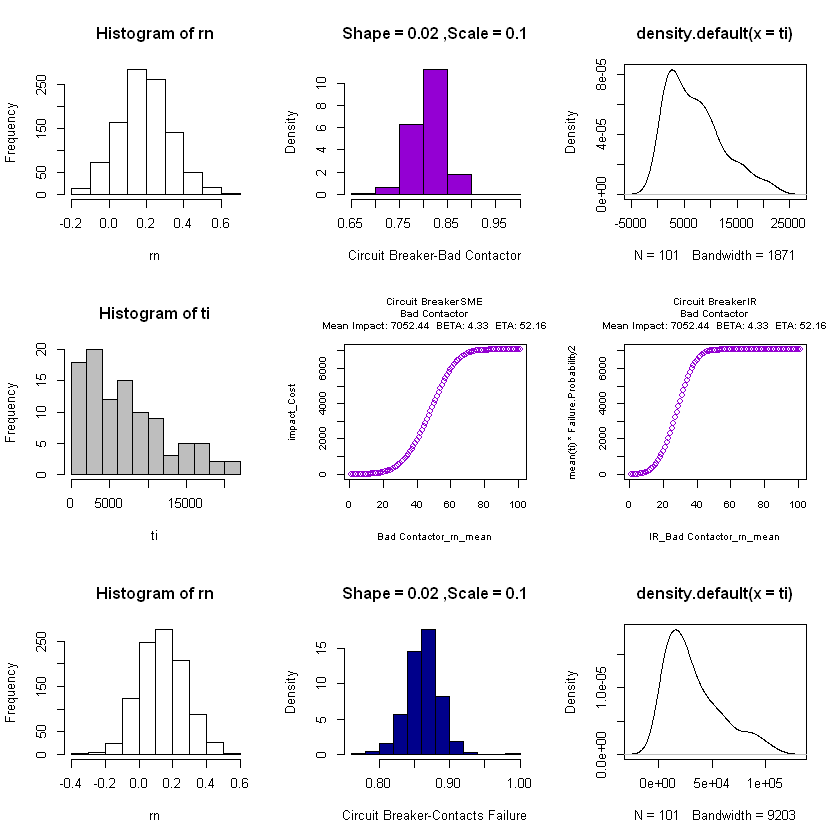

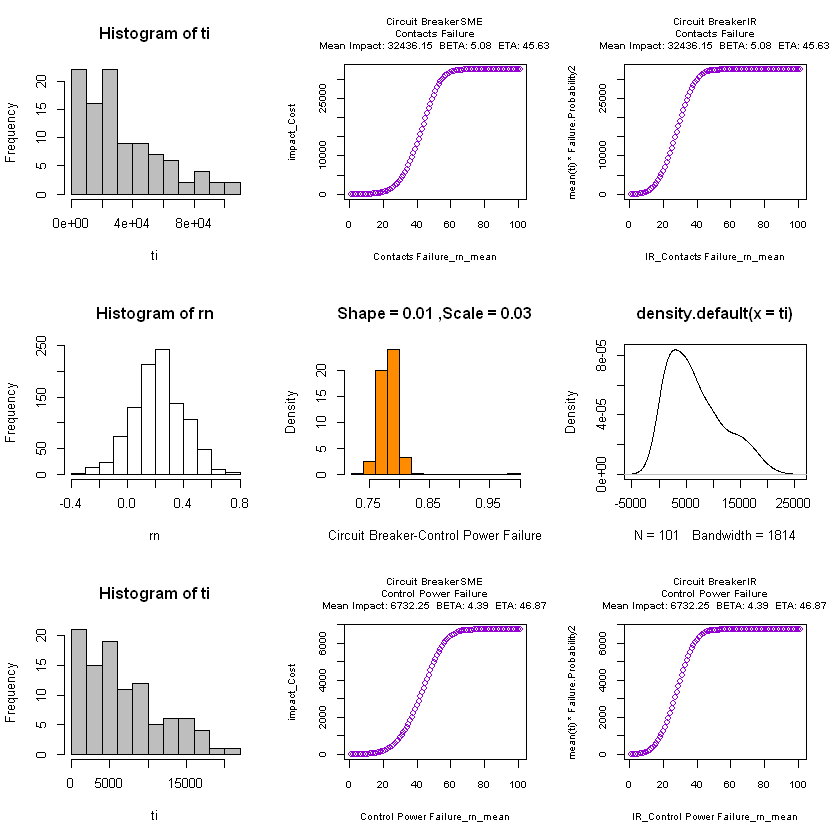

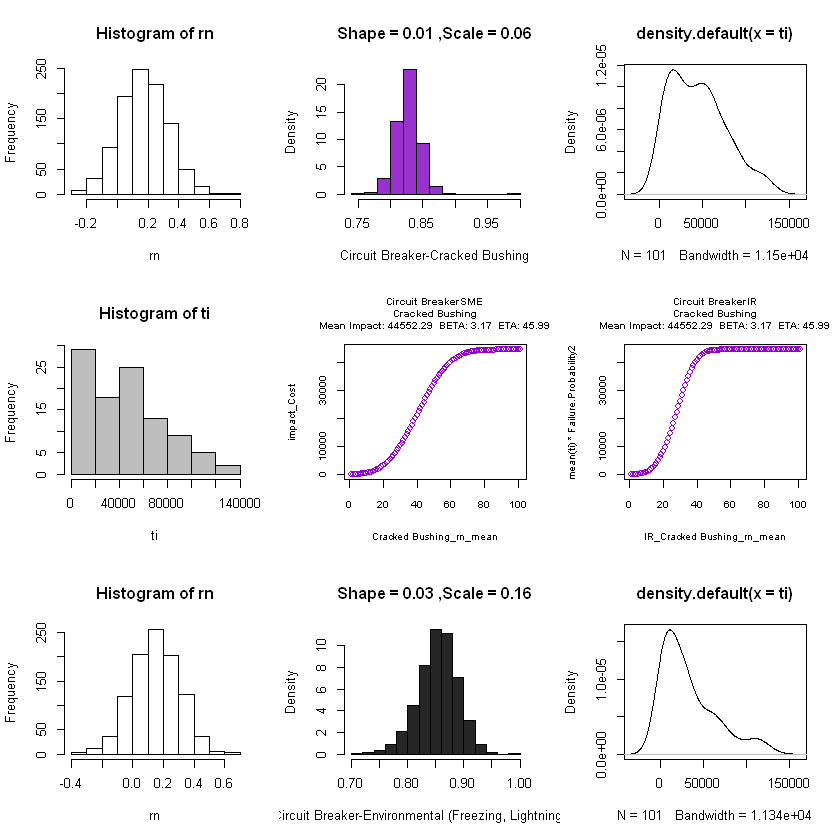

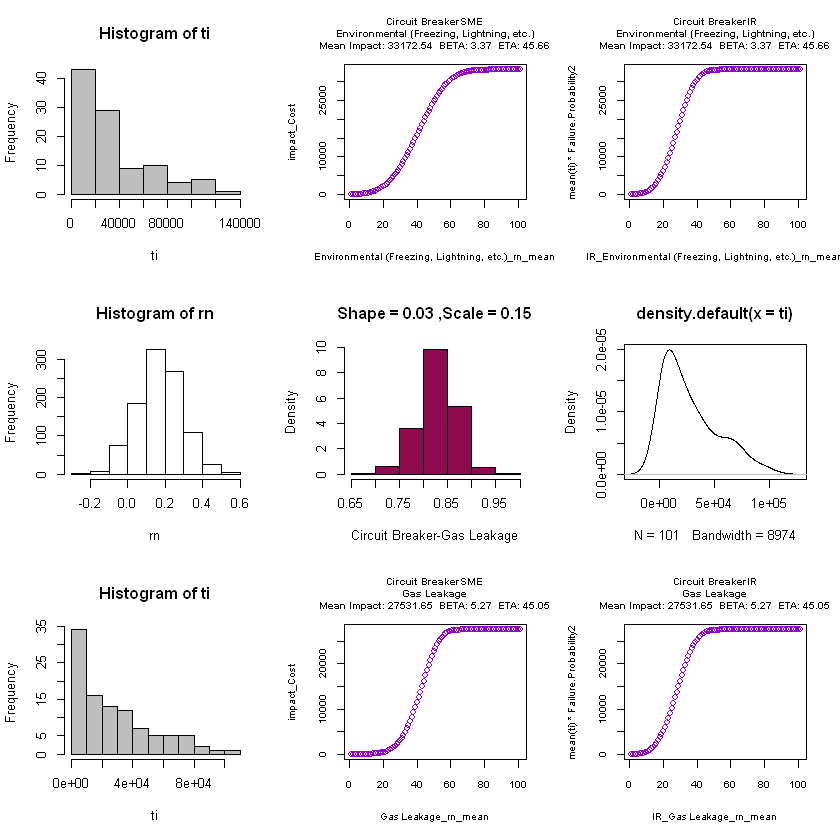

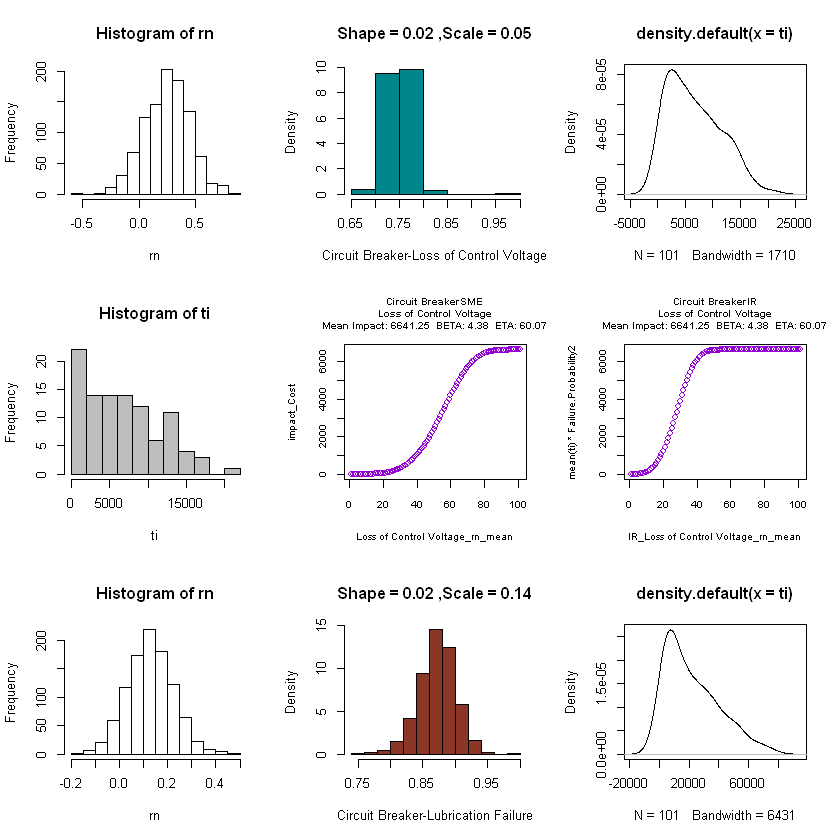

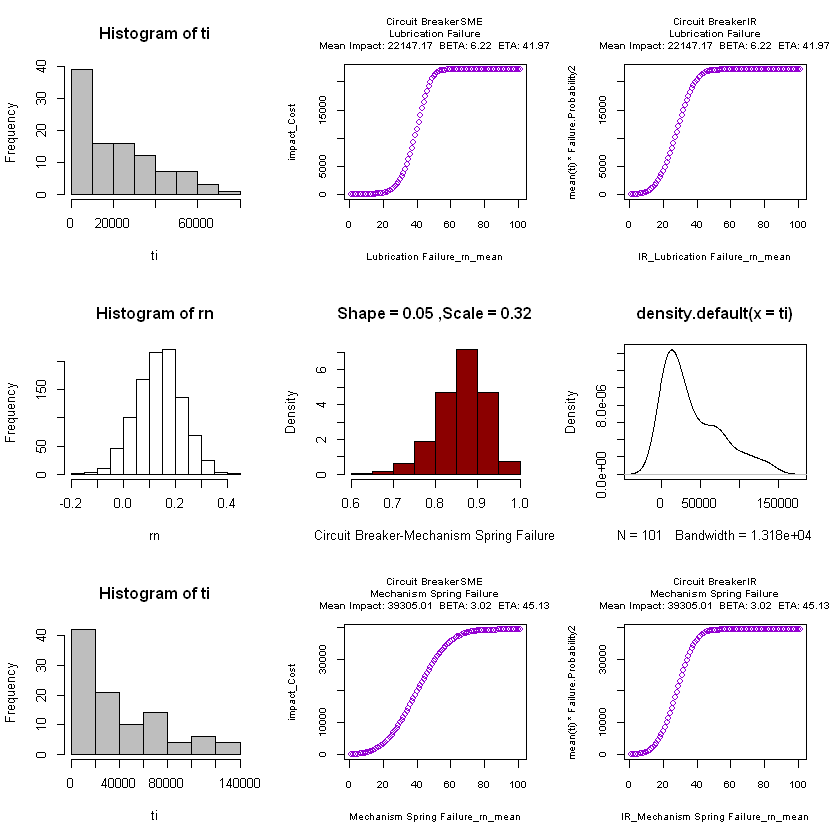

[1] "i-2"
[1] "i-2"
[1] Generator Winding, Multi-turn Coil, Stator
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner


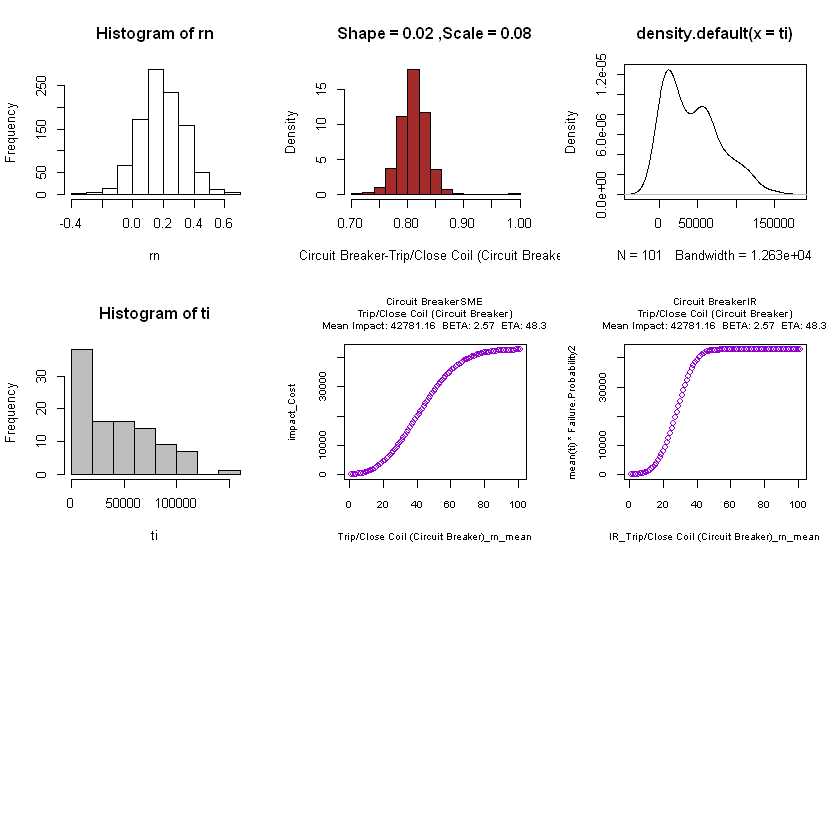

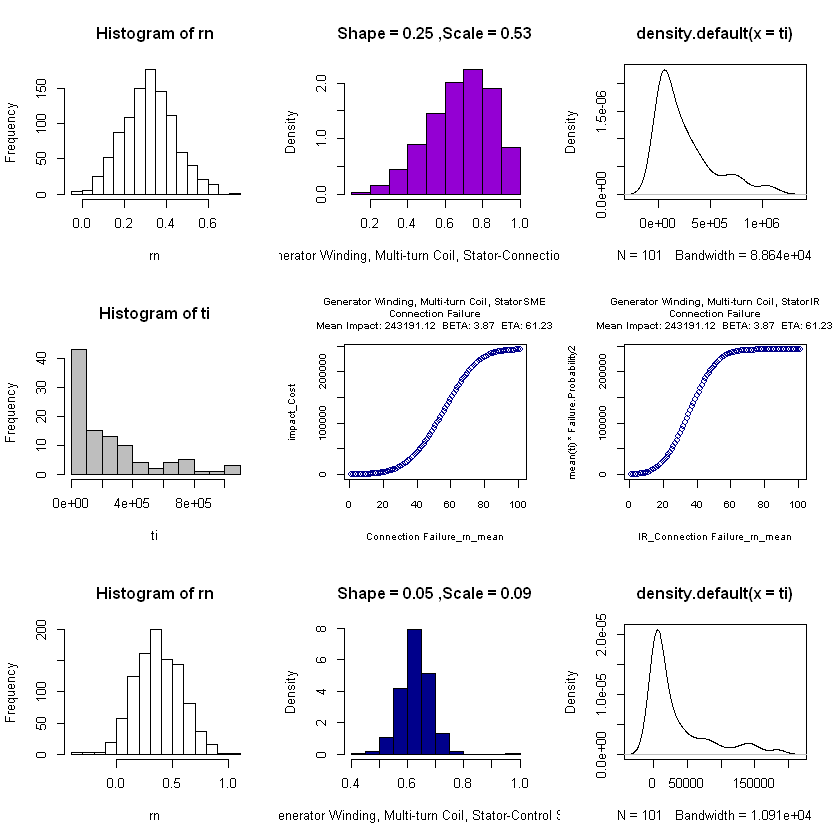

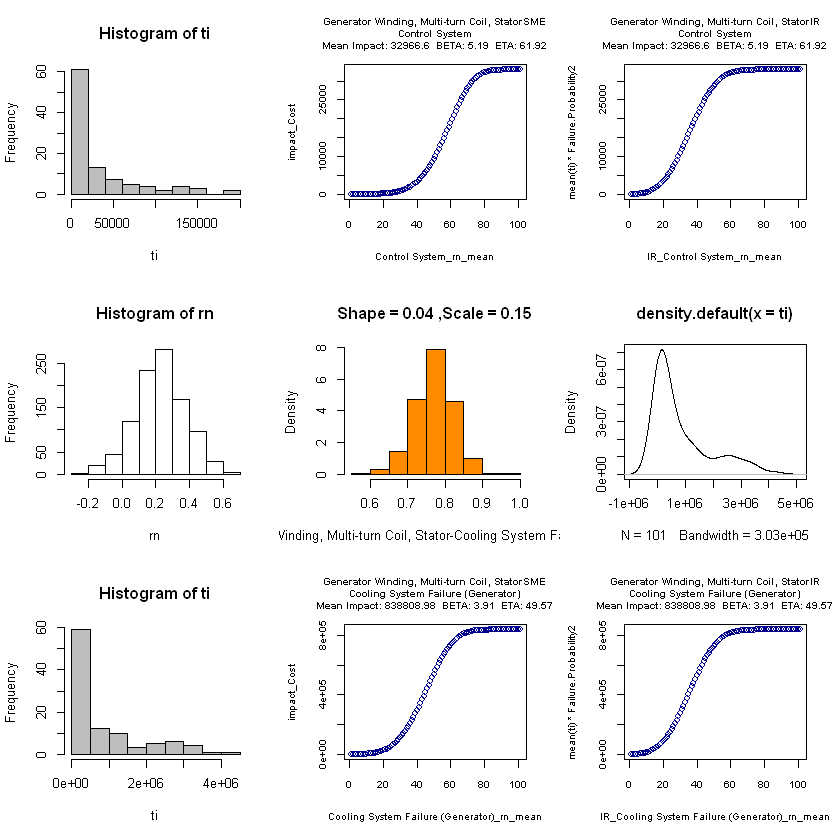

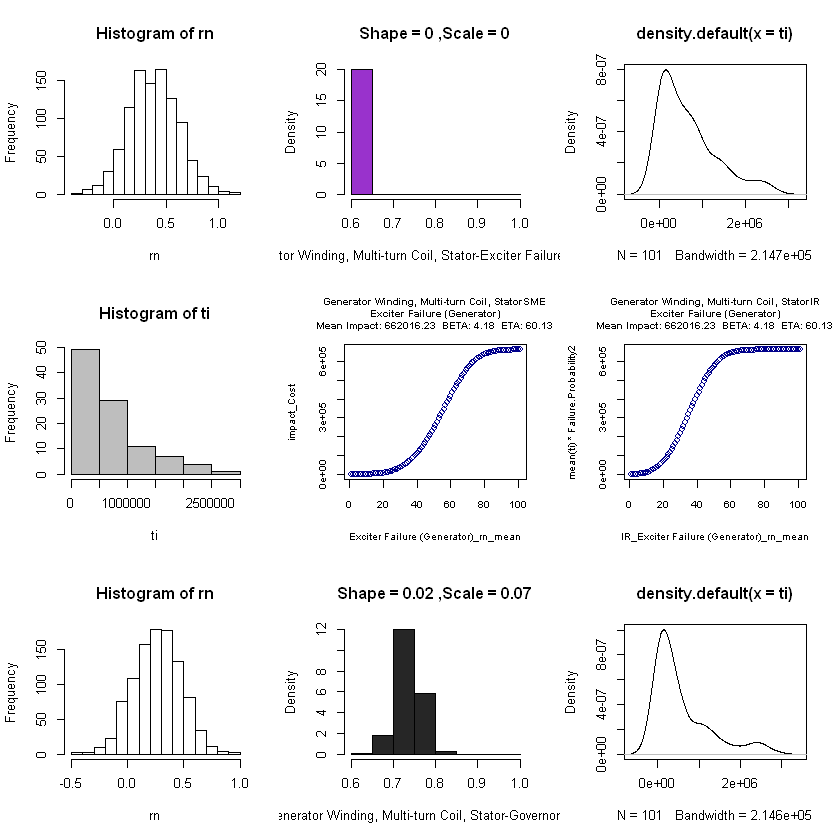

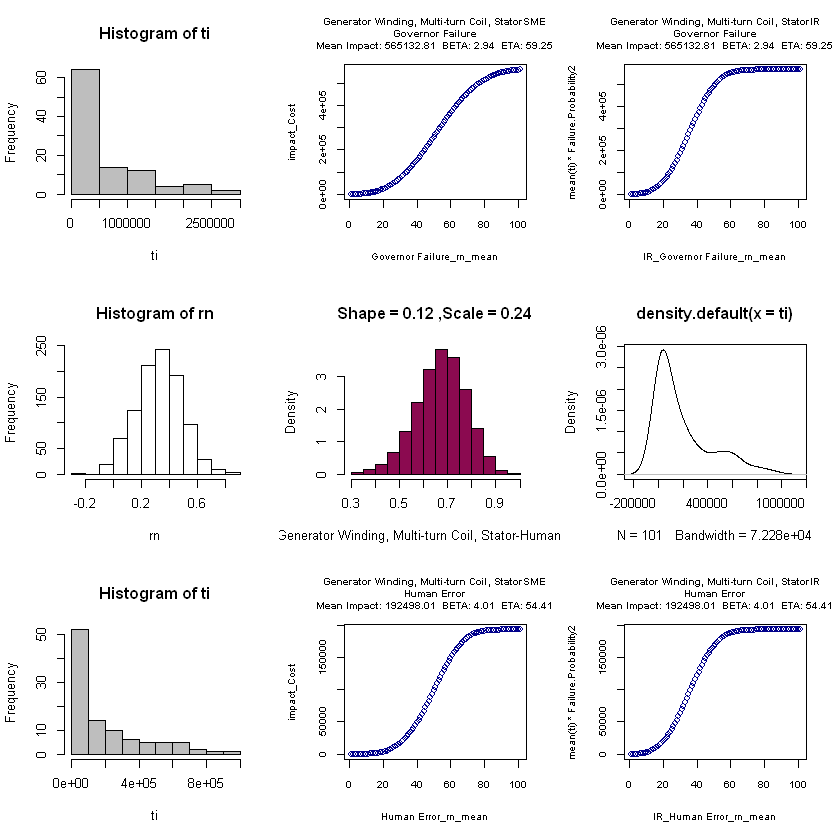

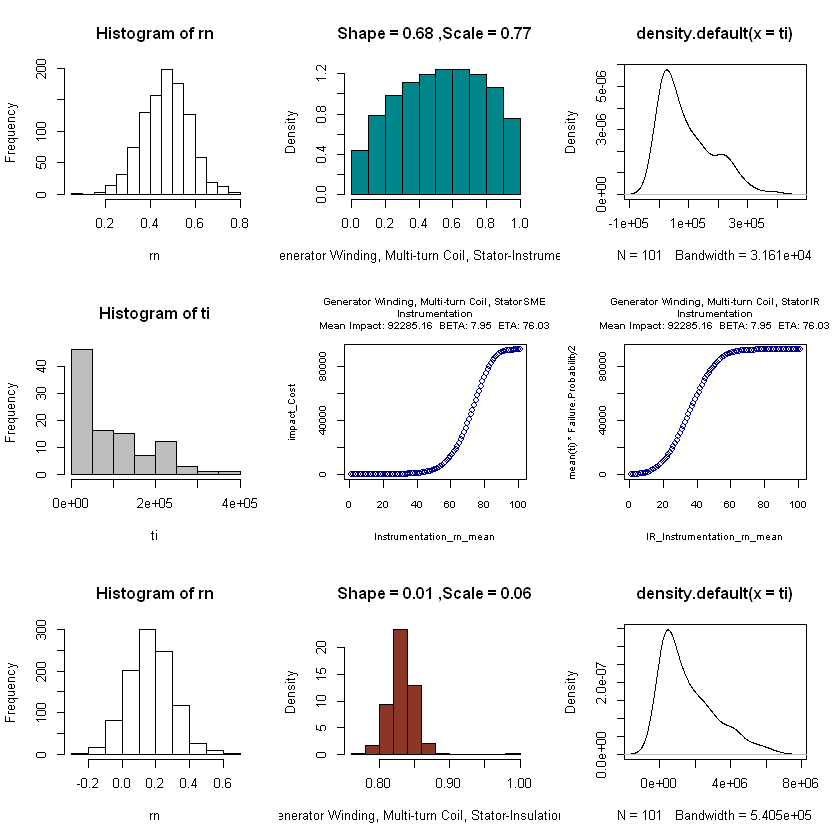

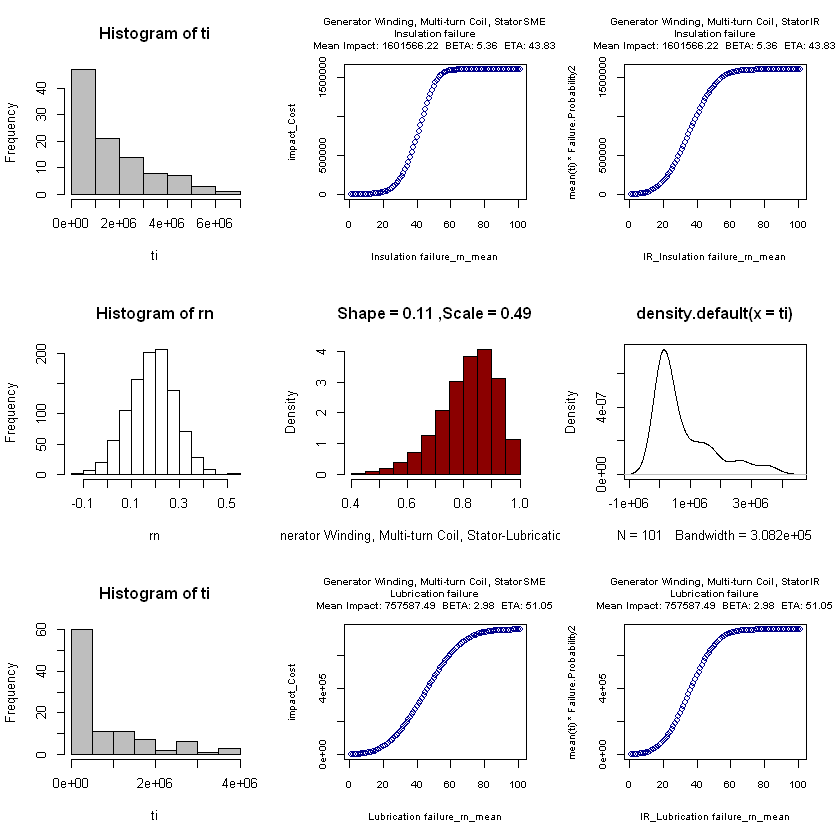

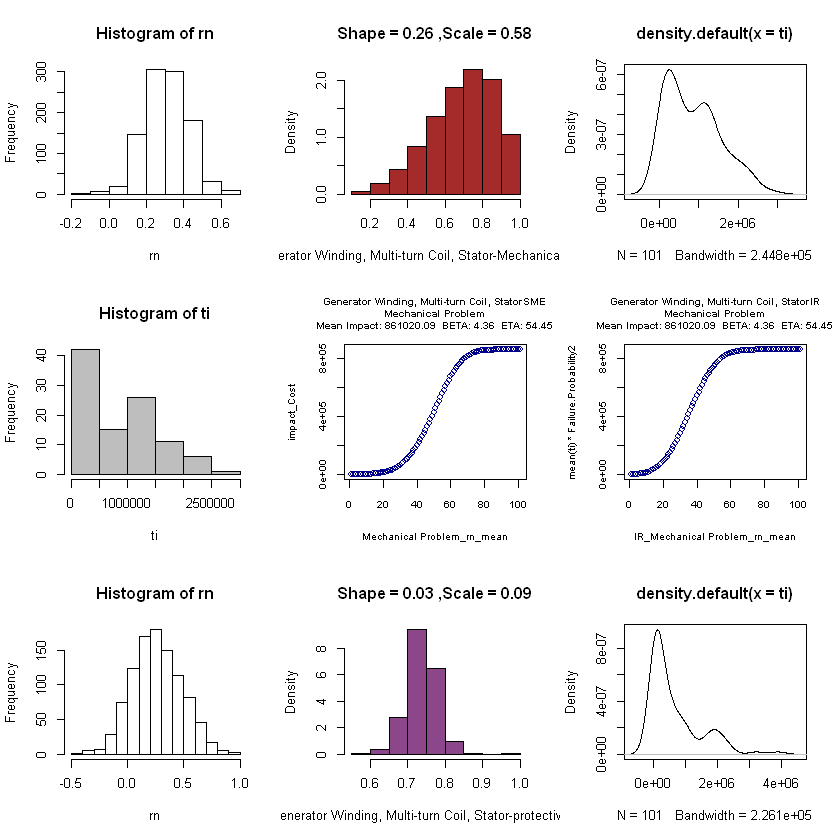

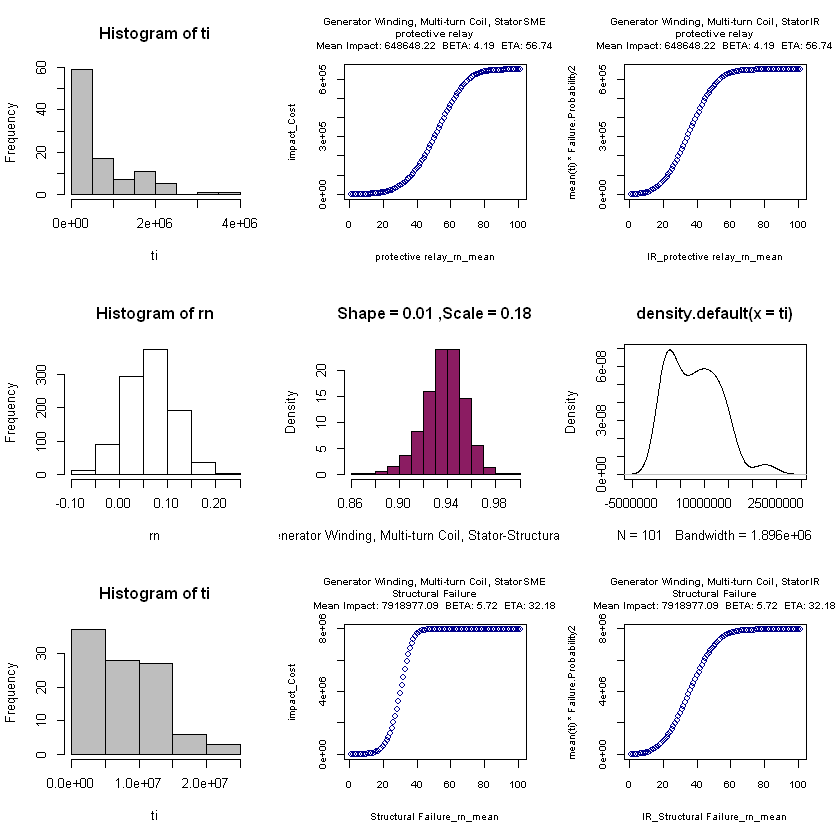

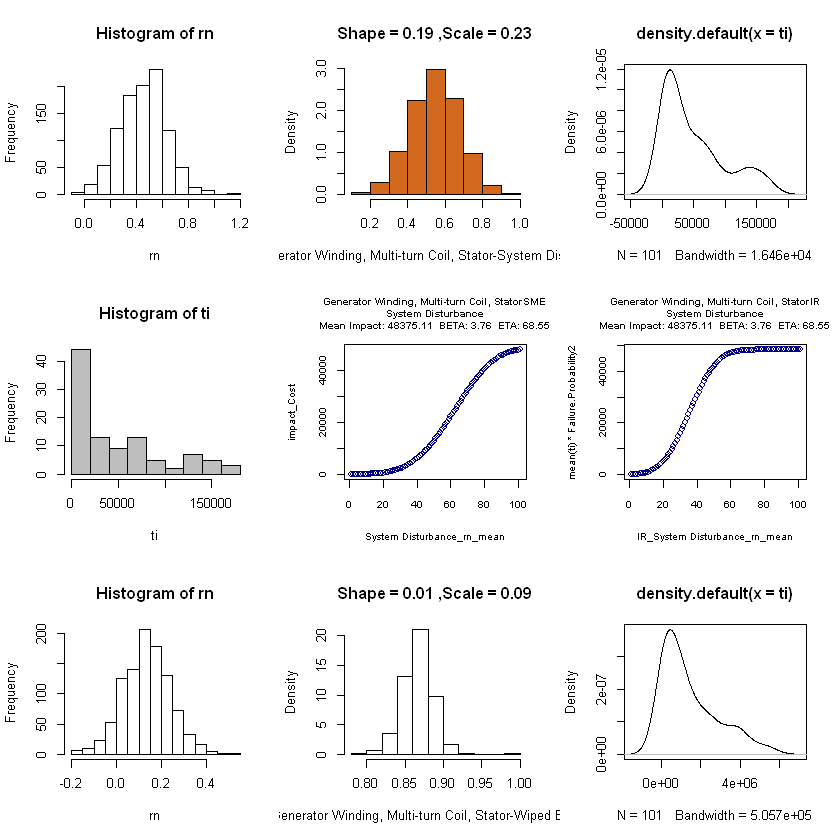

[1] "i-3"
[1] "i-3"
[1] Pole
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner
[1] "5"


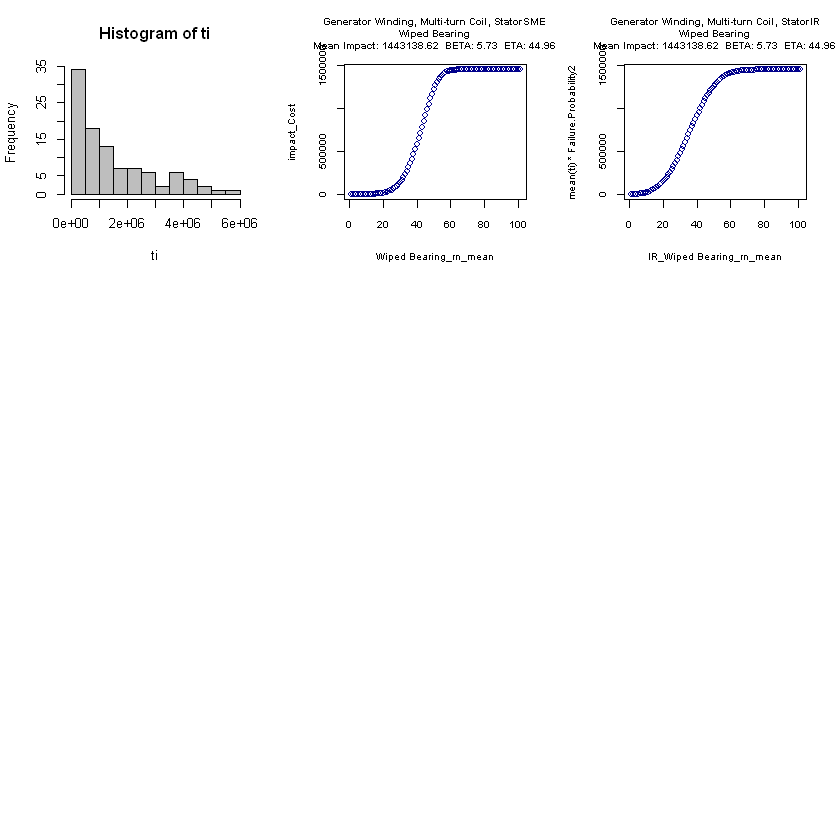

[1] "5"
[1] "5"


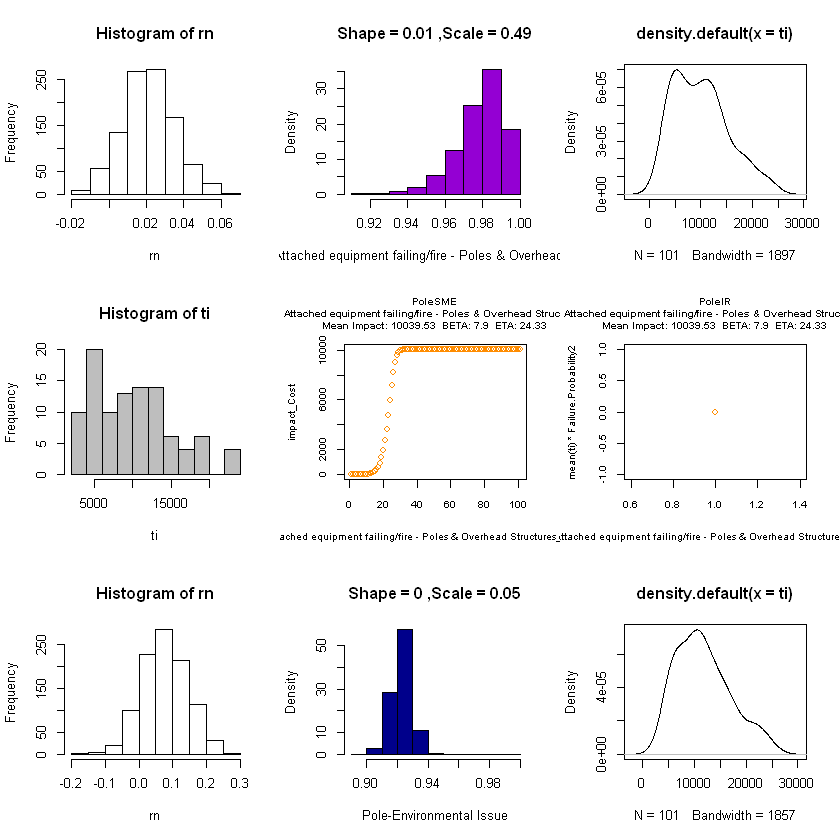

[1] "5"


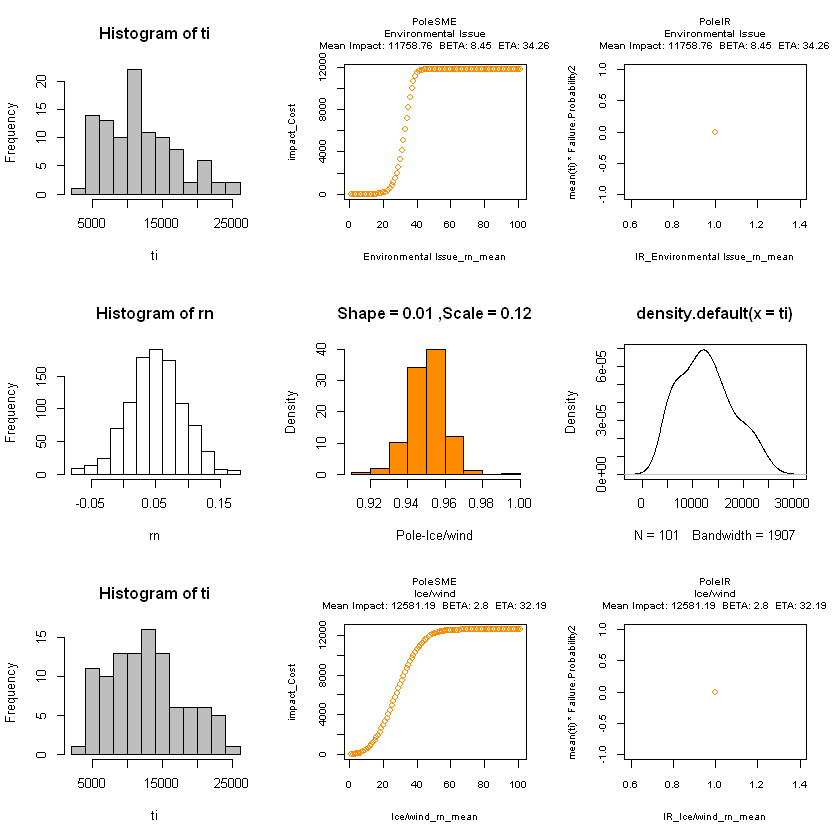

[1] "5"
[1] "5"


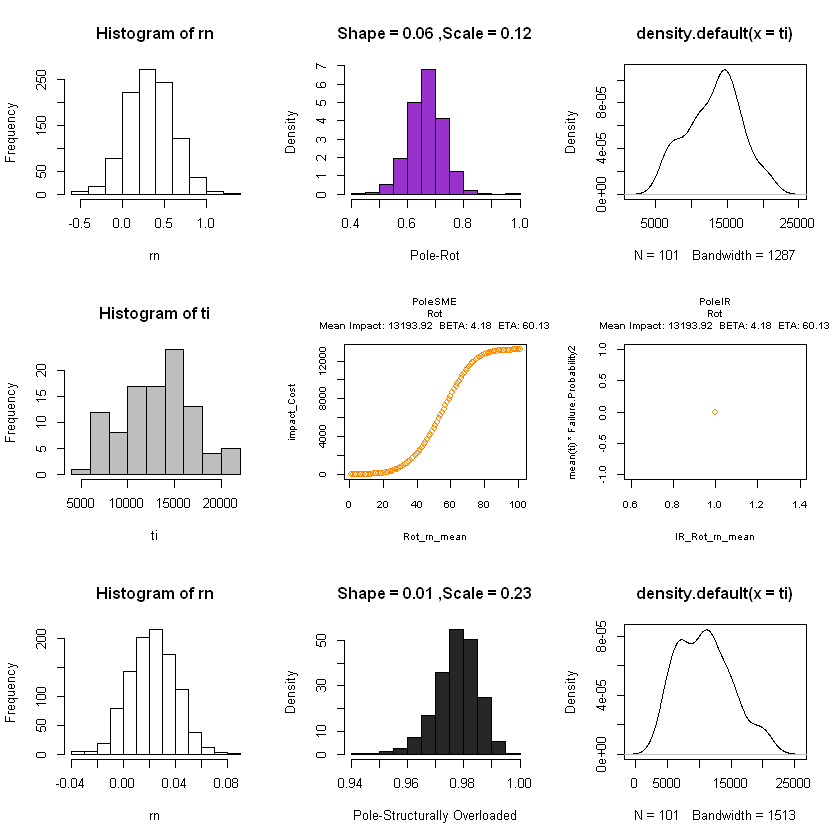

[1] "i-4"
[1] "i-4"
[1] Stator
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner


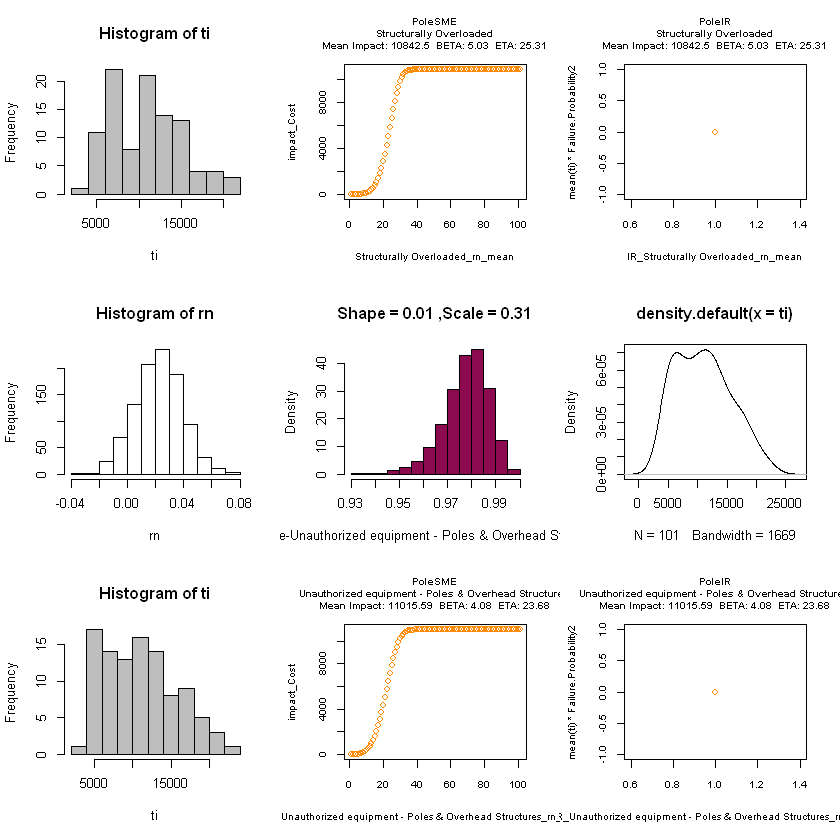

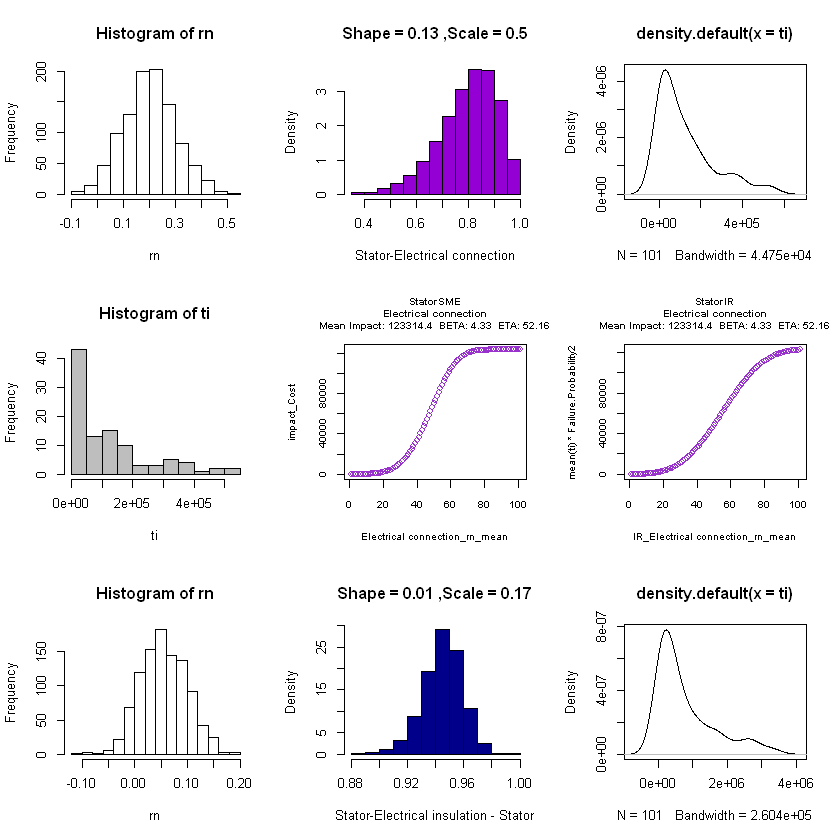

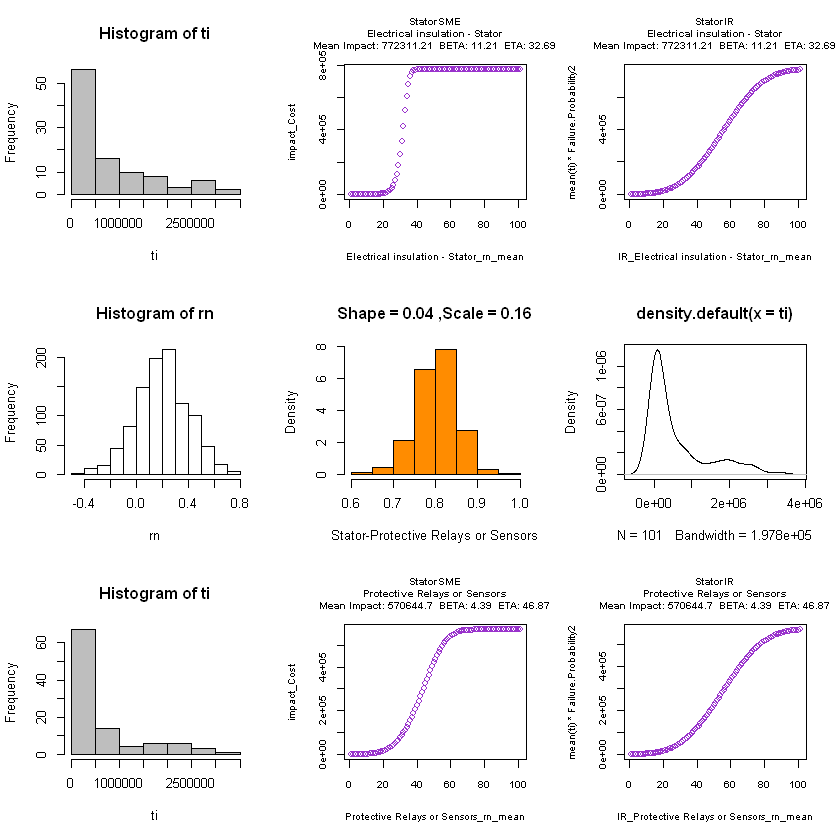

[1] "i-5"
[1] "i-5"
[1] Substation Transformer
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner


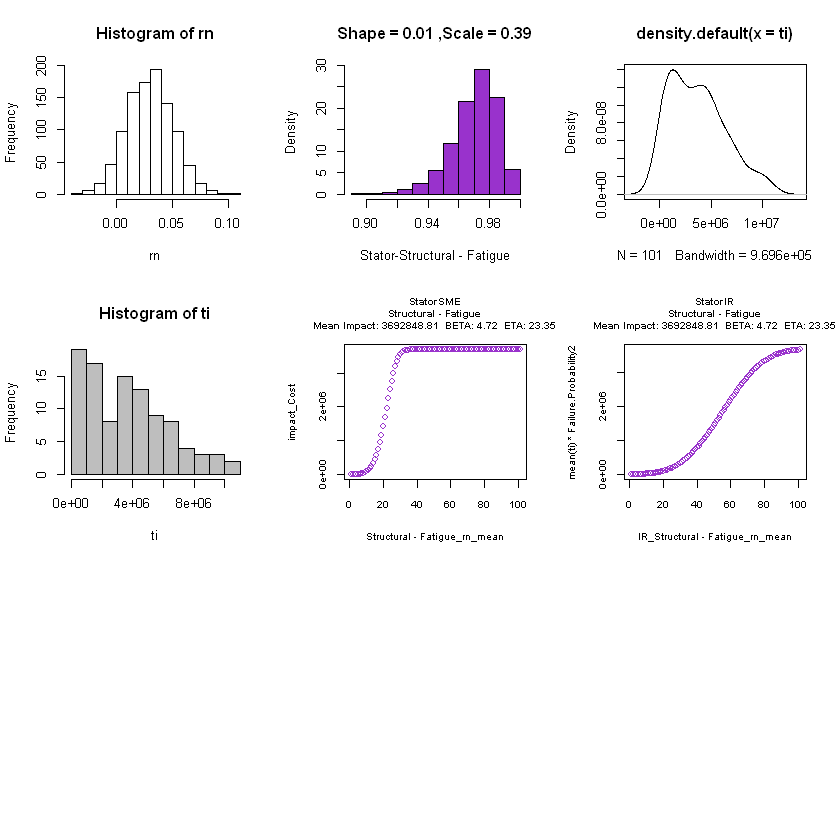

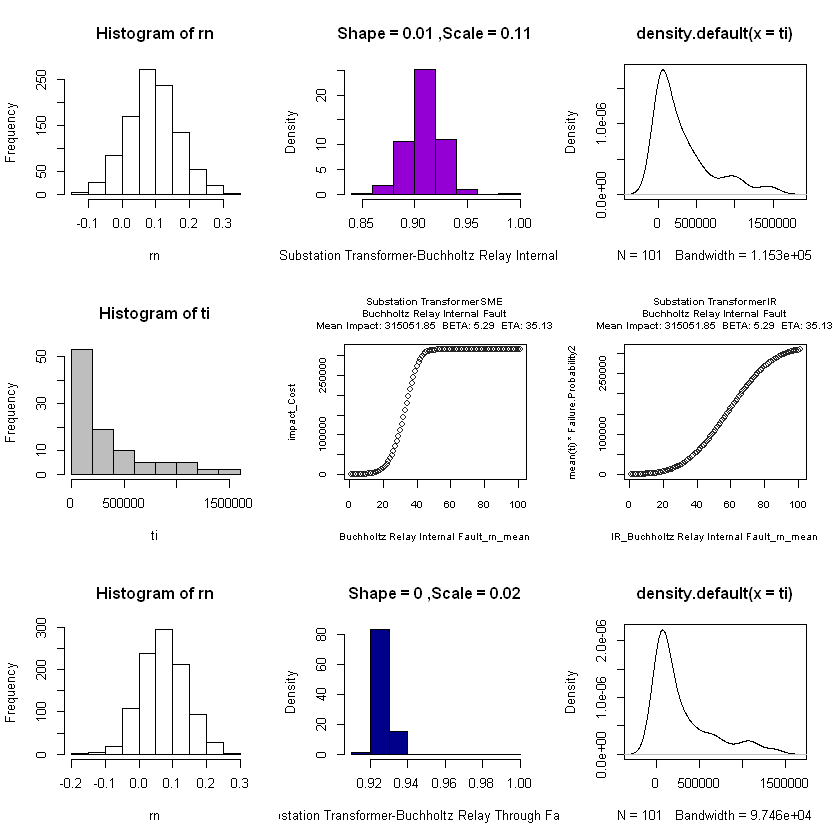

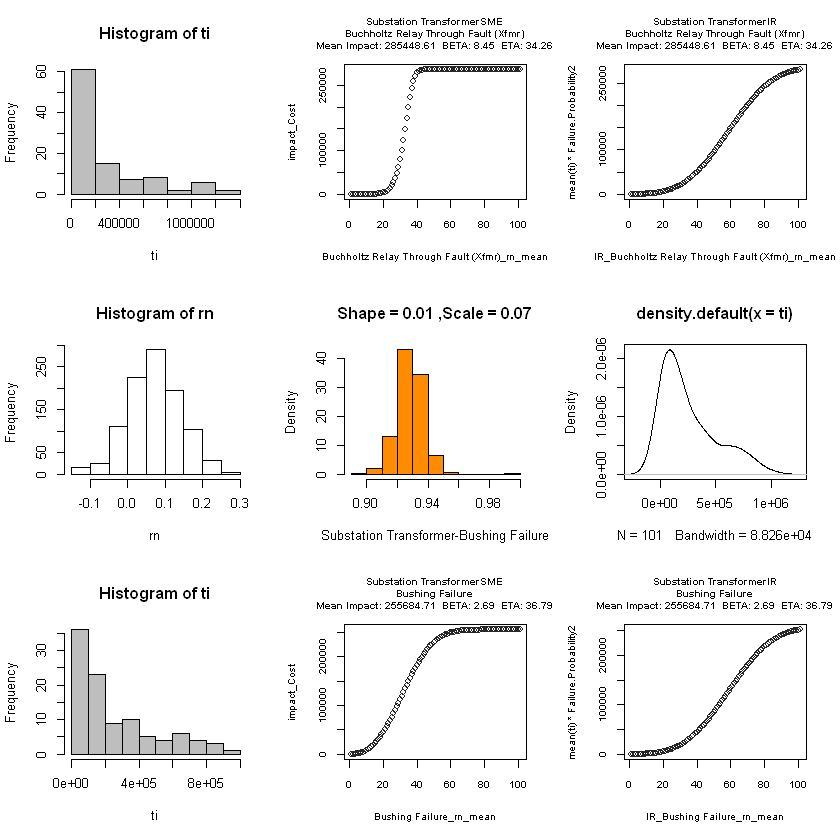

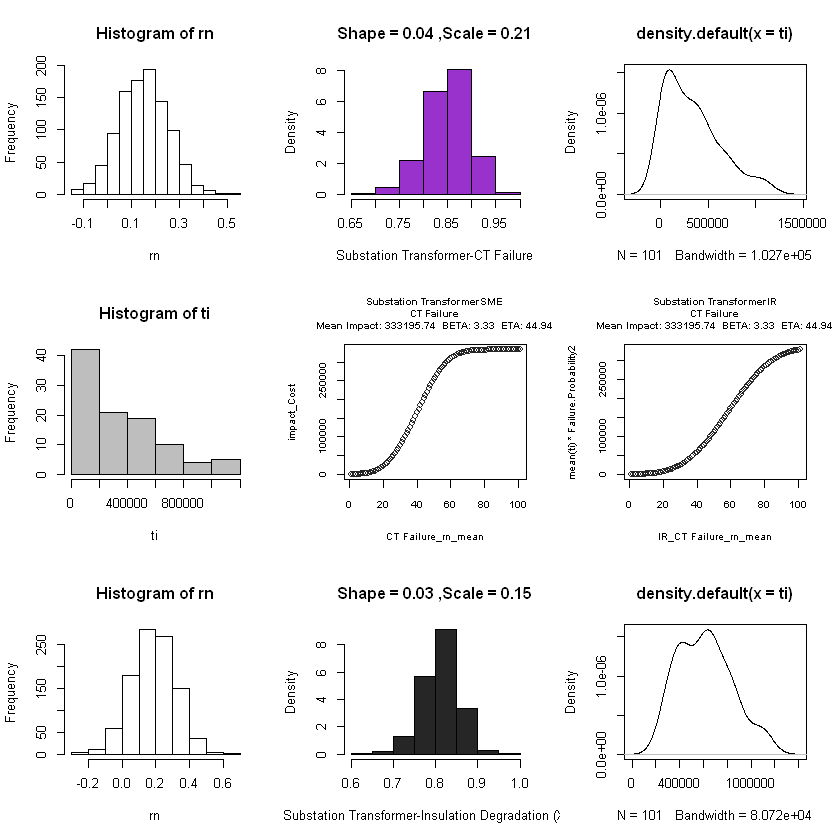

[1] "i-6"
[1] "i-6"
[1] Turbine, Runner
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner


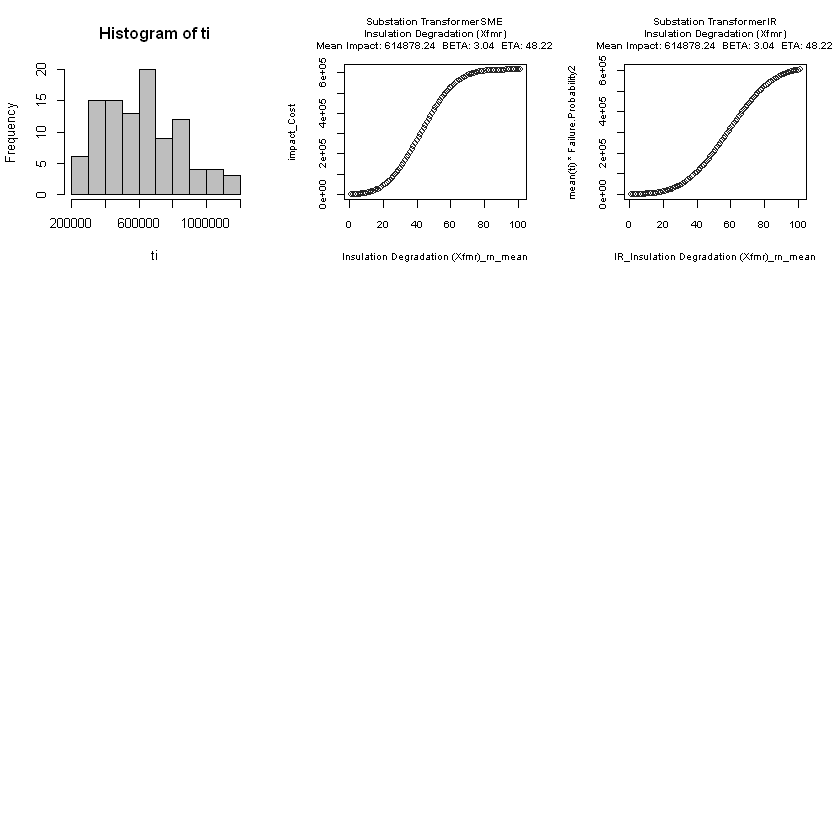

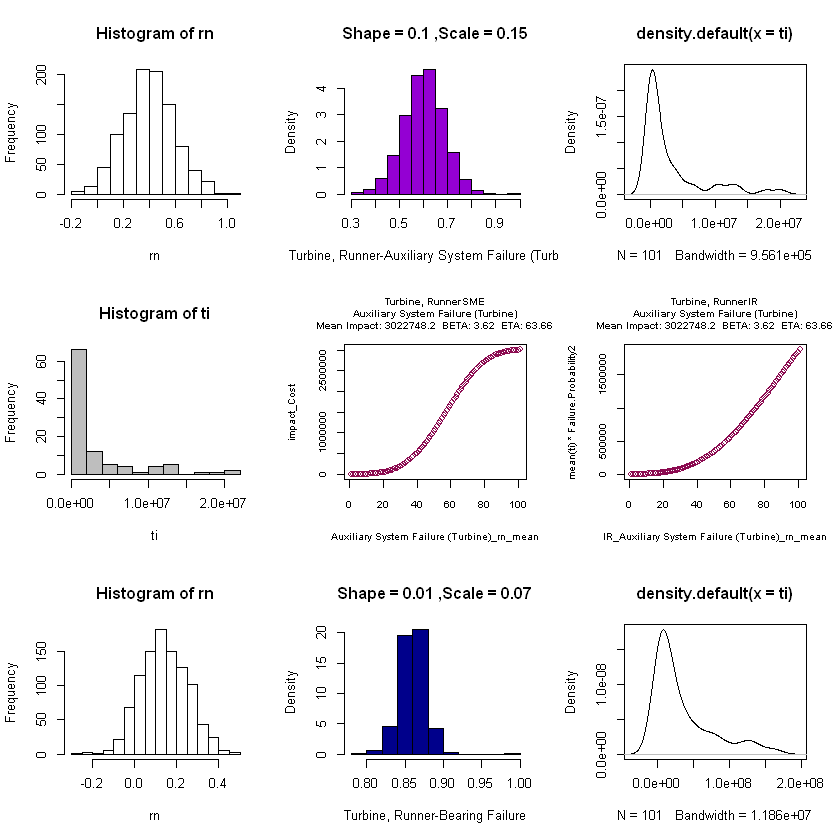

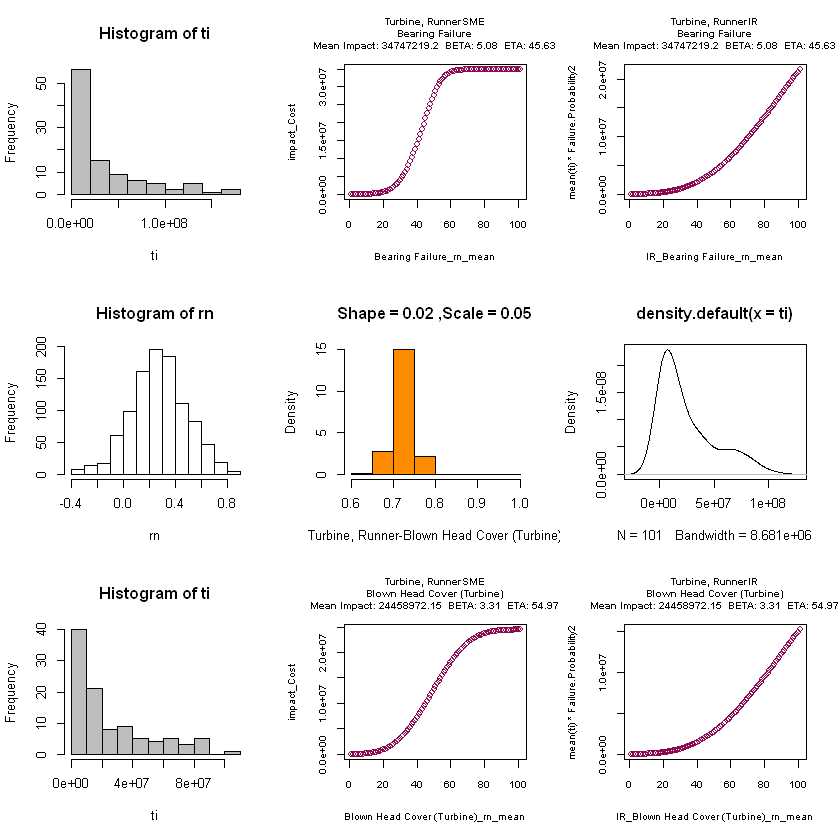

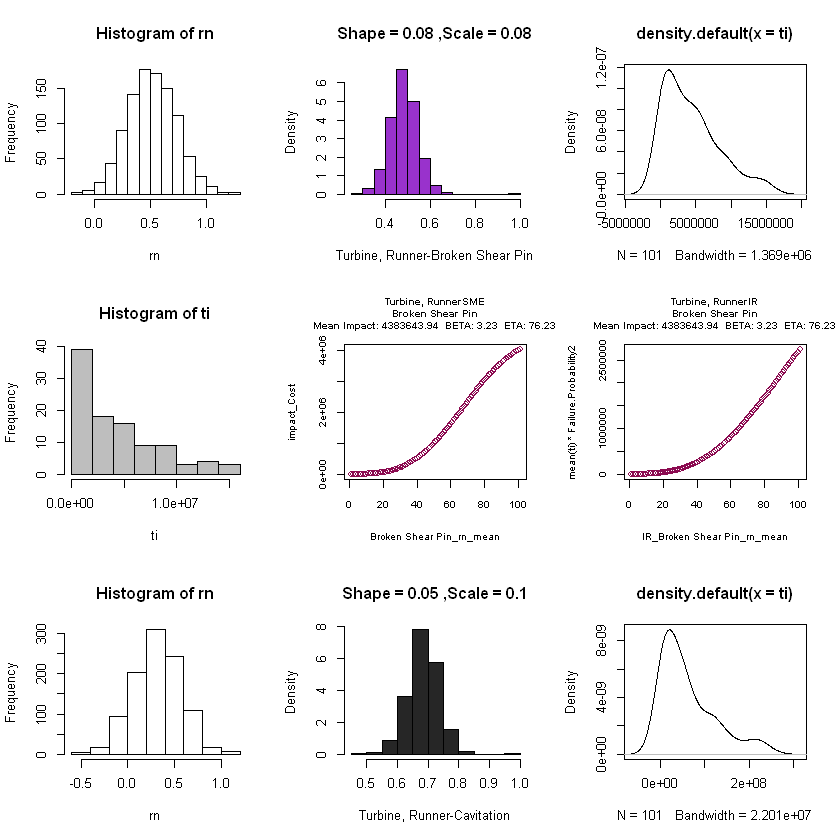

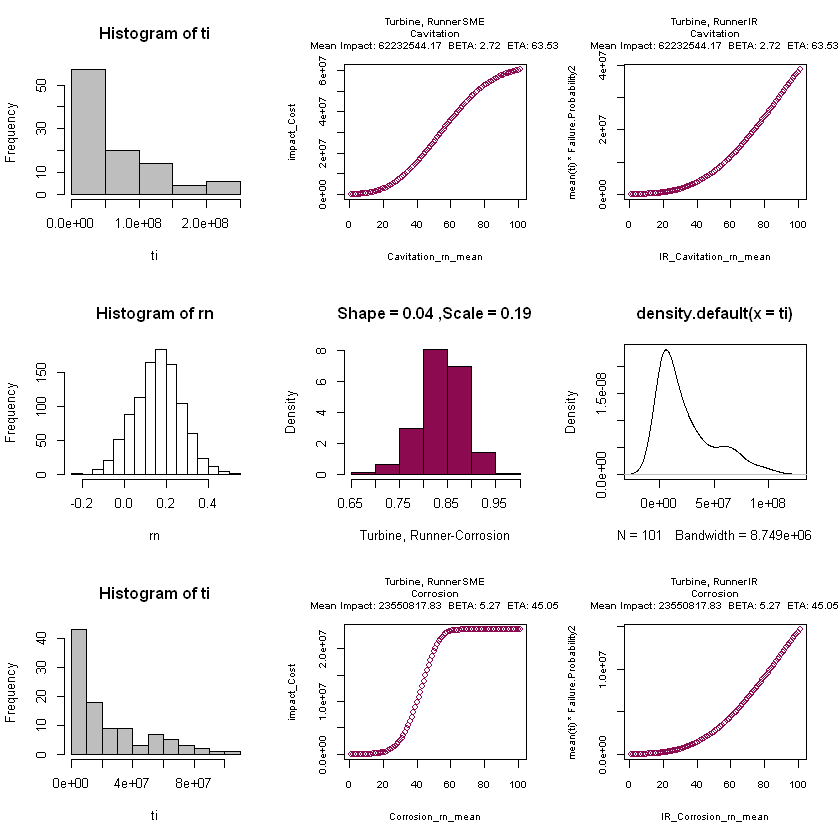

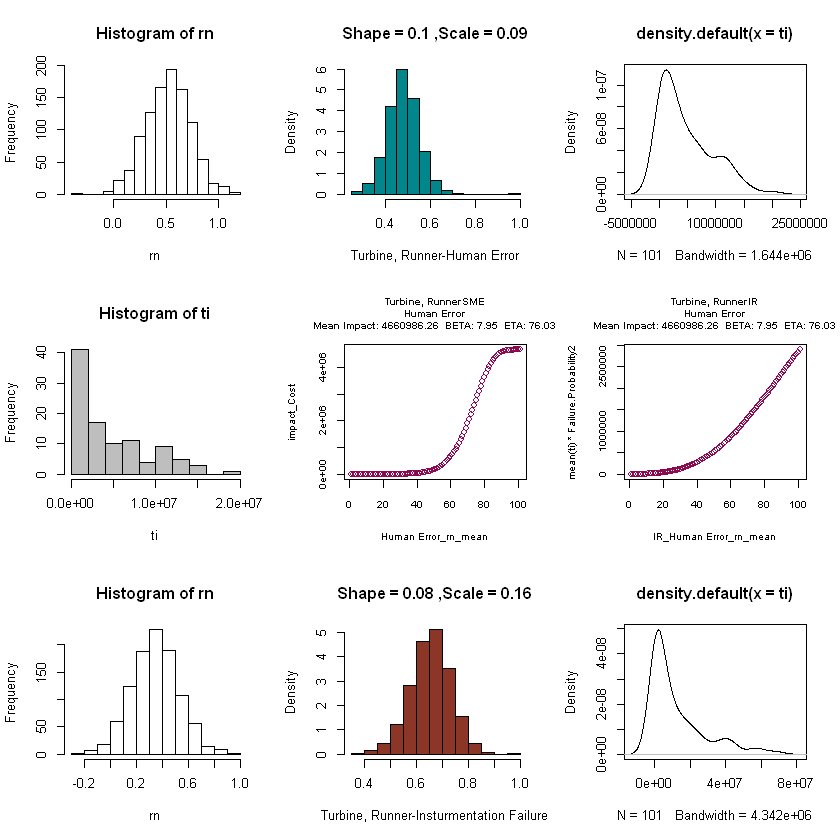

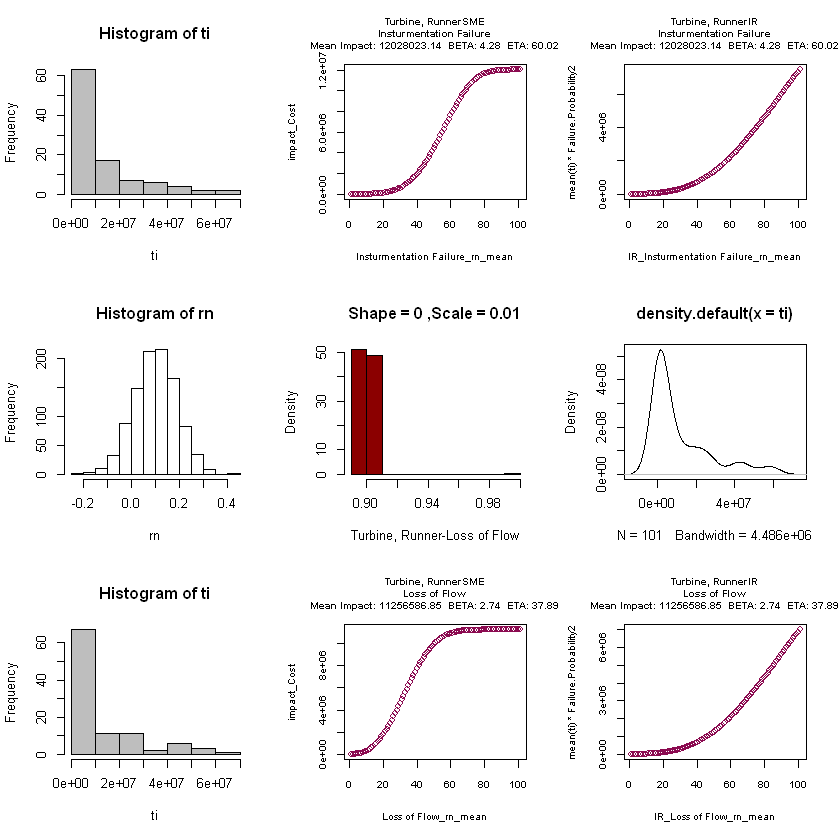

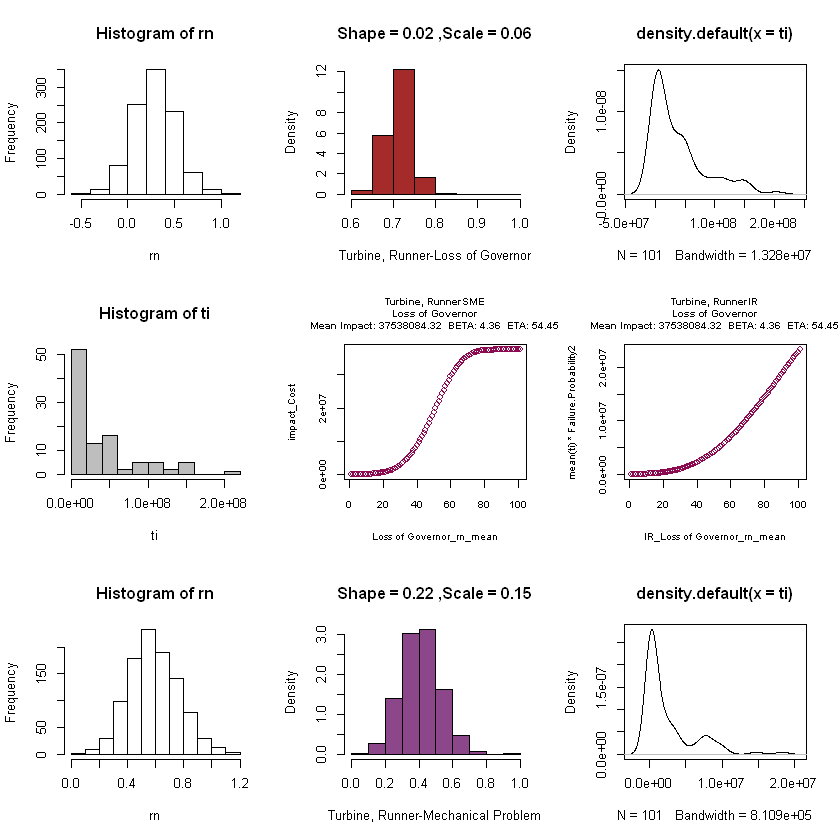

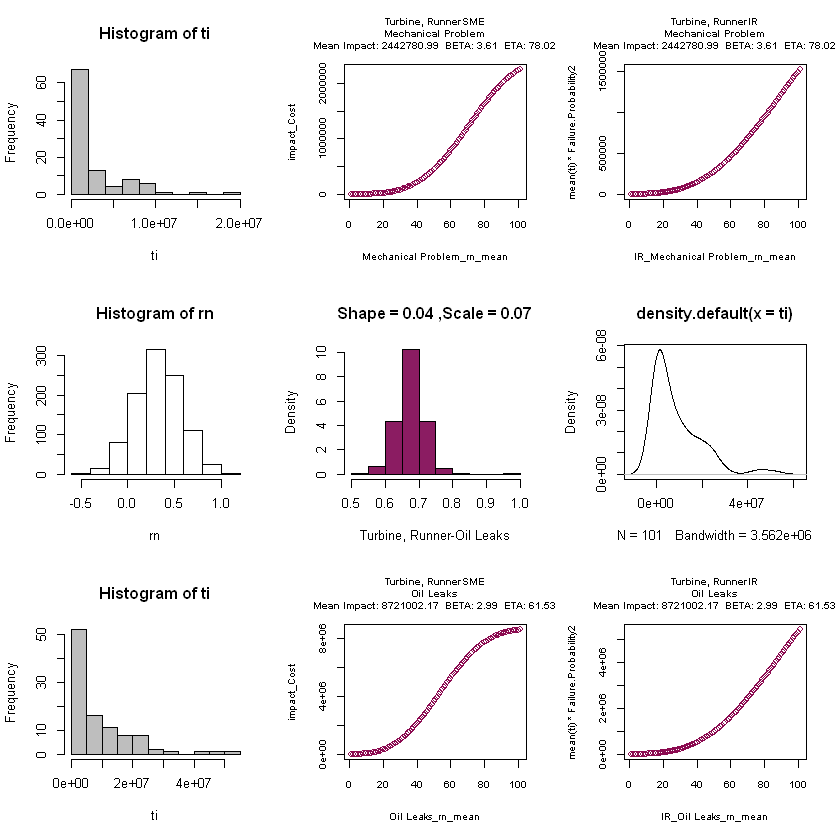

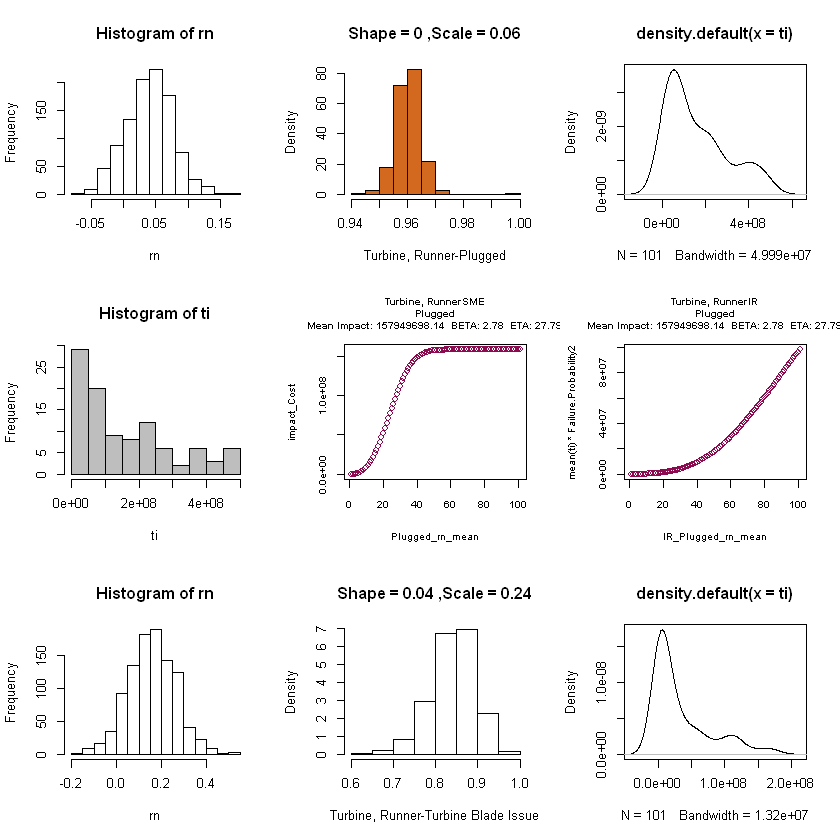

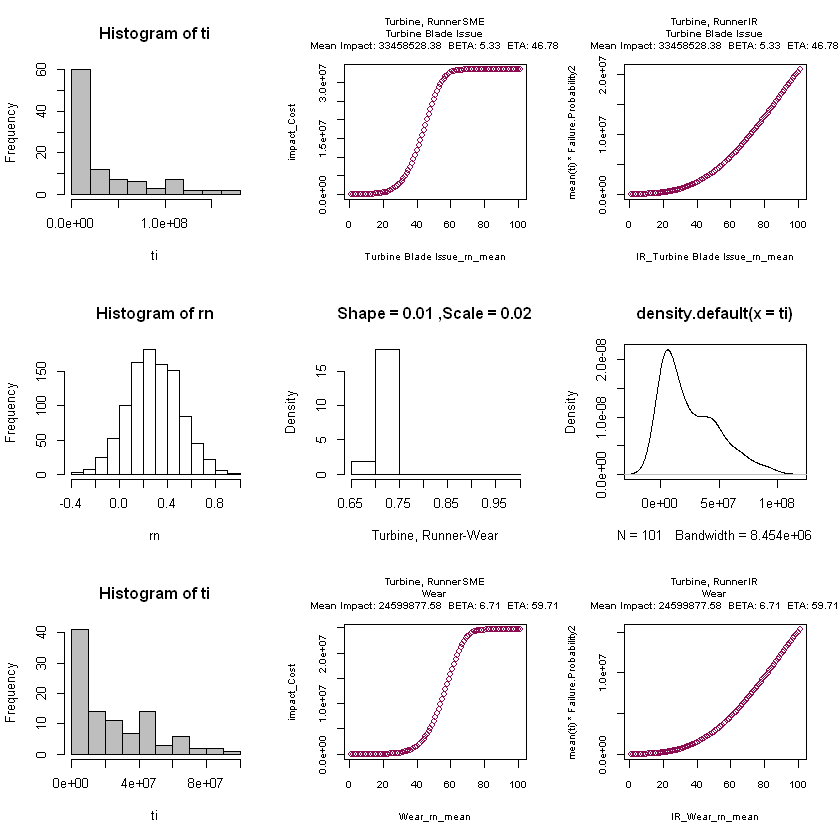

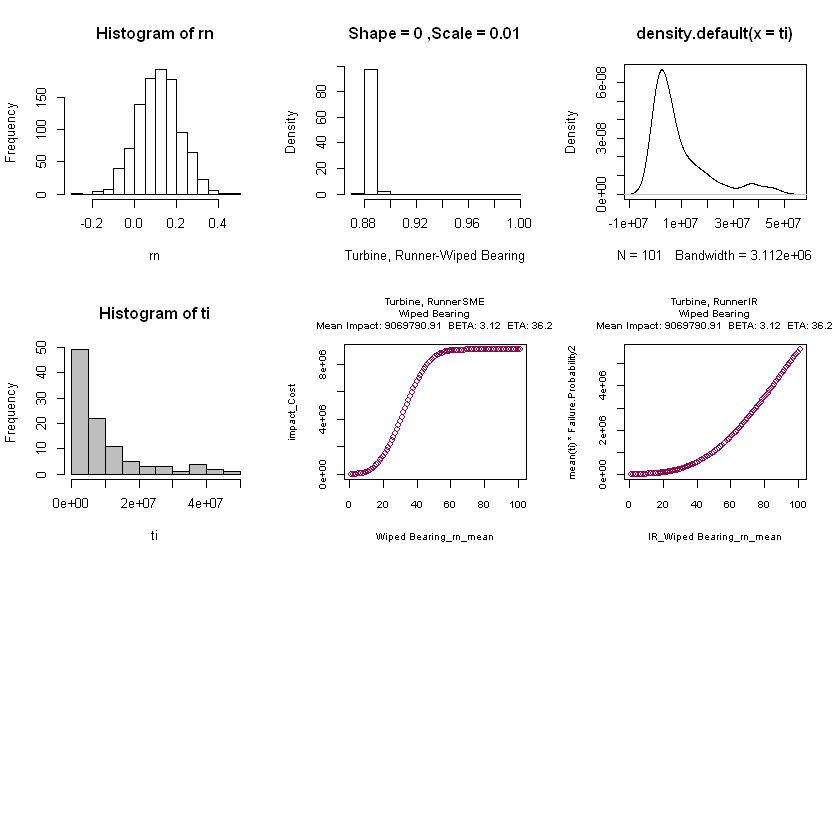

In [11]:
i<- 1
# i<-3
for (i in 1:length(AC)) {
  x<- seq(0.001,1, by = 0.001) # Vecotr of probability
  xx<- seq(0,1, by = 0.01)
  counter<- 1000
  Failure<- as.data.frame(x)
  Impact<- as.data.frame(x)
  print(paste("i", i, sep = "-"))
  print(paste("i", i, sep = "-"))
  asset<- (AC[i]) # 
  print(asset)
  
  
  #************************************************************# 
  #***************   Filter Data by Asset Class   *************#
  #************************************************************#
  risk<-   as.data.frame( filter(risk.all, Asset == as.character(asset), Type == 1) )
  popul <- as.data.frame( filter(population, Asset.Class == as.character(asset)) )
  Asset.count<- length(unique(popul$Equipment))
  risk<- risk[, c(1,2,6:11)]
  
  risk[, "PF.Low"]<- as.numeric(as.character(risk[ ,"PF.Low"]))
  risk[, "PF.High"]<- as.numeric(as.character(risk[ ,"PF.High"]))
  risk[, "PI.Low"]<- as.numeric(as.character(risk[ ,"PI.Low"]))
  risk[, "PI.High"]<- as.numeric(as.character(risk[ ,"PI.High"]))
  #************************************************************# 
  #*************   Group by each Risk Scenario  ***************#
  #*********   MEAN of SME input per Risk Scenario  ***********#
  #*********          NORMAL DISTRIBUTION           ***********#
  #************************************************************# 
  Asset<- rep(AC[i],times = length(unique(risk$Risk)))
  Risk<- as.data.frame(Asset)
  Risk[,c(2,3)]<- ((risk %>%
                      group_by(Risk) %>%
                      summarise(PF.Low_mean= (mean(PF.Low)/100))))
  
  Risk[4]<-(risk %>%
              group_by(Risk) %>%
              summarise( PF.High_mean= (mean(PF.High)/100)))[2]   
  
  Risk[5]<-(risk %>%
              group_by(Risk) %>%
              summarise( PI.Low_mean= (mean(PI.Low))))[2]   
  
  Risk[6]<-(risk %>%
              group_by(Risk) %>%
              summarise( PI.High_mean= (mean(PI.High))))[2]   
  
  
  
  cname<- paste0(i,"_Risk_",AC[i])     
  #************************************************************# 
  #*****   Create Aggregated Risk Table per Asset Class   *****#
  #************************************************************#  
  df<-as.data.frame(x)
  RandAge<- data.frame(x=1:10)
  Randnum<- data.frame(x=1:10)
  x2<- 1:length(Risk$Risk)
  df2<- data.frame(x2)     
  df2$risk<- Risk$Risk 
  par(mfrow=c(3,2))
  set.seed(123)
  impact_Cost_rn_mean<- as.data.frame(xx)
  IR_impact_Cost_rn_mean<- as.data.frame(xx)
  Failure.Probability <- 0
  Failure.Probability2 <- 0
  #************************************************************# 
  #*********   Calculate beta Distribution parameters  ********#
  #*********  Shape and Scale for each Risk Scenario   ********#
  #************************************************************#    
  j<- 1
  par(mfrow=c(3,3))
  set.seed(123)
  for (j in 1:length(Risk$Risk)) {
    #****************************************************# 
    #***    running Uniform Distribution to create    ***#
    #**   random vector probability    from SME input  **#
    #****************************************************# /length(unique(popul$Equipment)) 
    x3<- seq(1:10)
    Eta<- 100
    Beta<- 3
    xplot1<-0.3
    xplot2<- 0.4
    
    
    
    #***************************************** ***************************************** ***************************************** 
    #          ****************************************           MEAN  NORMAL DISTRIBUTION         *****************************# 
    #          ****************************************        SME RECOMMENDATION FOR ETA BETA        ***************************# 
    #***************************************** ***************************************** *****************************************  

    rn<- rnorm(counter,mean= (Risk[j,"PF.Low_mean"] + Risk[j,"PF.High_mean"] ) /2, sd=  Risk[j,"PF.High_mean"]- (Risk[j,"PF.Low_mean"] + Risk[j,"PF.High_mean"] ) /2)
    hist(rn)
    q<- quantile(rn)
    mu<-  mean(rn)
    var<- if(sd(rn)==0){0.00001} else{sd(rn)}
    es<- estBetaParams(mu, var)
    a<- abs(as.numeric(es[1])) #alpha
    b<- abs(as.numeric(es[2])) #beta
    rpbeta<-pbeta(x, shape1= a, shape2=b , ncp = 0, lower.tail = TRUE, log.p = FALSE) 
    hist(rpbeta,probability=TRUE,col= color[j]   ,main= paste0("Shape = ",round(a,2), " ,Scale = ",round(b,2)), xlab = paste0(Risk[j,"Asset"], "-", Risk[j,"Risk"]))
    
    ti<- triangle::rltriangle(101,Risk[j,"PI.Low_mean"] ,Risk[j,"PI.High_mean"],(((Risk[j,"PI.Low_mean"] )+(Risk[j,"PI.High_mean"]))/2))
    
    plot(density(ti))
    hist(ti, col= 'gray')
    Risk[j,"Impact_rn_mean"] <- round(mean(ti))
    
    randAge<- 0
    ruall<- 0
    while(length(randAge)< 11){
      for (ii in 1:10000) {  run<- runif(1,0,1) 
      if (  run < mu  & (length(randAge)<11)  ) {
        randAge<- c(randAge,ii)
        ruall<- c( ruall,run)   }   
      ii<- ii+1    }   
    }
    
    df3<- data.frame( x3)
    df3["rand_num"]<- ruall[-1]  
    df3["AgeToFail"]<- Eta *(log (1/ (1-df3["rand_num"]))) ^ (1/Beta)
    df3["RankedAgeToFailure"]<- sort(df3$AgeToFail)  
    df3["PlotPosition"]<-     (x3-xplot1)/((10)+xplot2)
    df3["lnMedRank"]<- log(1/(1-df3["PlotPosition"])) #***** is abs ok?????????********
    df3["lnAgetoFailure"]<- log(df3["RankedAgeToFailure"])  
    df3["cumTime"]<- cumsum(df3["AgeToFail"])
    df3["failureAtEachTime"]<- rep(1,length(x3))
    df3["y"]<- x3
    df3["lny"]<-log(df3["y"])
    df3["lnx"]<-log(df3["cumTime"])    
    lm1<-    lm(log(df3$y) ~ log(df3$cumTime)  ) 
    s1<- summary(lm1)
    df2[j,"Rank_Reg_R2"]<- s1$r.squared# R^2 (Growth Plot)
    df2[j,"Rank_Reg_beta_slope"]<- s1$coefficients[2]
    df2[j,"Rank_Reg_Lambda_intercept"]<- exp(s1$coefficients[1])
    
    lm2<- lm(df3$lnAgetoFailure~ log  (df3$lnMedRank)) # deleted log for df$lnMedRank?????????
    s2<- summary(lm2)
    df2[j,"R2"]<- s2$r.squared# R^2 (Growth Plot)    
    df2[j,"BETA"]<- 1/s2$coefficients[2] #slope           #############   BETA    ##############
    lm3<- lm(log(df3$RankedAgeToFailure)~ log(df3$lnMedRank))
    s3<- summary(lm3)
    df2[j,"ETA"] <-  exp(s3$coefficients[1] )#intercept   #############   ETA    ###############
    df2[j,"Asset"]<- AC[i]
    Failure.Probability <- (pweibull( 1:101, shape = df2[j,"BETA"] , scale= df2[j,"ETA"],lower = TRUE))
    impact_Cost<- mean(ti)* Failure.Probability 
    impact_Cost_rn_mean[j+1]<- impact_Cost
    n<- paste0( Risk$Risk[j],"_rn_mean")
    names(impact_Cost_rn_mean)[j+1]<- n
    plot(impact_Cost ,col=color[i],main = paste0(AC[i],"SME\n", Risk$Risk[j], "\nMean Impact: ",round(mean(ti),2),  "  BETA: ", round(df2[j,"BETA"],2),  "  ETA: ", round(df2[j,"ETA"],2) ),
         cex.lab=.75, cex.axis=.75, cex.main=.75, cex.sub=.75, xlab = n)
    #***************************************** ***************************************** ***************************************** 
    #          *****************************************           MEAN  NORMAL DISTRIBUTION         *****************************# 
    #          *********************************           INDUSTRIAL RECOMMENDATION FOR ETA BETA        *************************# 
    #          **************                        source : R:\Asset Management\WLCM\Documentation                **************
    #          **************                    3DRAFT TPU Distribution Pole Analysis 032020 (003).pptx            **************
    #          **************                       2017_Federal_Hydropower_Replacements_Book_BW_1.1.pdf            **************
    #          ********** Hydrovision 2017 - Estimating Weibull Parameters for USACE and BPA Hydropower Assets - Patev.pdf *******
    #***************************************** ***************************************** *****************************************  
    
    if (AC[i] == "Circuit Breaker") {
      Failure.Probability2 <-   pweibull(1:101 , shape = 3.6 , scale= 31 )
    } else if ( AC[i] == "Generator Winding, Multi-turn Coil, Stator" ) {
      Failure.Probability2 <-  pweibull(1:101 , shape = 3.2 , scale= 40 )
    } else if (AC[i] == "Substation Transformer") {
      Failure.Probability2 <-   pweibull(1:101, shape = 3.3 , scale= 66 )
    }else if (AC[i] == "Stator") {
      Failure.Probability2 <-   pweibull(1:101, shape = 3.3 , scale= 62 )
    }else if (AC[i] == "Rotor") {
      Failure.Probability2 <-   pweibull(1:101, shape = 2.9 , scale= 98 )
    }else if (AC[i] == "Exciters") {
      Failure.Probability2 <-   pweibull(1:101, shape = 3.3 , scale= 66 )
    }else if (AC[i] == "Governors") {
      Failure.Probability2 <-   pweibull(1:101, shape = 3.2 , scale= 25 )
    }else if (AC[i] == "Gates") {
      Failure.Probability2 <-   pweibull(1:101, shape = 3.4 , scale= 74 )
    }   else if (AC[i] == "Turbine, Runner" ) {
      Failure.Probability2 <-   pweibull(1:101 , shape = 3 , scale= 102 )
    }  else {
      print("5")  #df$Failure.Probability <-    pweibull(x , shape = 1 , scale= 1 )
    }
    impact_Cost<- mean(ti)* Failure.Probability2 
    IR_impact_Cost_rn_mean[j+1]<- impact_Cost
    n<- paste0( "IR_", Risk$Risk[j],"_rn_mean")
    names(IR_impact_Cost_rn_mean)[j+1]<- n
    
    plot(mean(ti)* Failure.Probability2 ,col=color[i],main = paste0(AC[i],"IR\n", Risk$Risk[j], "\nMean Impact: ",round(mean(ti),2),  "  BETA: ", round(df2[j,"BETA"],2),  "  ETA: ", round(df2[j,"ETA"],2) ),
         cex.lab=.75, cex.axis=.75, cex.main=.75, cex.sub=.75, xlab = n)
    
    j<- j+1
    
  }
    
  
  
  
  
  WLCM[[i]]<- Risk
  cname<- paste0(i,"_",AC[i],"Risk")
  names(WLCM)[i] <- cname
  
  impact_Cost_rn_mean$age<- xx*100

  
  
  impact_Cost_rn_mean$Total_Impact_rn_mean <- rowSums (impact_Cost_rn_mean[-1], na.rm = FALSE, dims = 1)
  impact_Cost_rn_mean$Mean_Impact_rn_mean <- rowMeans(impact_Cost_rn_mean[-c(1,(  length(impact_Cost_rn_mean)))], na.rm = FALSE, dims = 1)
  
  impact_Cost_rn_mean$Asset<- AC[i]
  impact_Cost_rn_mean$Prob<- "rn_mean_Impact_Cost"
  impact_Cost_rn_mean$x<- xx
  impact_Cost_rn_mean$age<- xx*100
  WLCM[[length(AC)+i]]<- impact_Cost_rn_mean  
  cname<- paste0(i, "_Impact_Cost_", AC[i])
  names(WLCM)[length(AC) +i] <- cname
  
  
  IR_impact_Cost_rn_mean$IR_Total_Impact_rn_mean <- rowSums (IR_impact_Cost_rn_mean[-1], na.rm = FALSE, dims = 1)
  IR_impact_Cost_rn_mean$IR_Mean_Impact_rn_mean <- rowMeans(IR_impact_Cost_rn_mean[-c(1,(  length(IR_impact_Cost_rn_mean)))], na.rm = FALSE, dims = 1)
  
  IR_impact_Cost_rn_mean$Asset<- AC[i]
  IR_impact_Cost_rn_mean$Prob<- "rn_IR_Mean_Impact_Cost"
  IR_impact_Cost_rn_mean$x<- xx
  IR_impact_Cost_rn_mean$age<- xx*100
  WLCM[[length(AC)*2+i]]<- IR_impact_Cost_rn_mean  
  cname<- paste0(i, "_IR_impact_Cost_", AC[i])
  names(WLCM)[length(AC)*2+i] <- cname
  
  WLCM[[length(AC)*3+i]]<- df2
  cname<- paste0(i, "_Weibull_param_", AC[i])
  names(WLCM)[length(AC)*3+i] <- cname
  
  i<- i+1
}


#### Save files in a csv format to use in Tableau

In [18]:
i<-1
allrisks<- data.frame()
id<- c("x","Asset","Prob","age","xx")

for (i in (length(AC)+1) :(length(AC)*3) ) {
  
  measure<- colnames(WLCM[[i]][!names(WLCM[[i]])%in% c("x","Asset","Prob","age","xx")])
  allr<-  reshape::melt(data = WLCM[[i]], id.vars = id, measure.vars = measure)
  allrisks<- rbind(allr, allrisks)
}

write.csv(allrisks,"All_Risks.csv")

i<- 1
all.Parameter<- data.frame()
for (i in 1 :length(AC)) {
print(AC[i])
  WLCM[[(length(AC)*3 )+i]]
  all.Parameter<- rbind(all.Parameter, WLCM[[(length(AC)*3 )+i]])
  i<- i+1
  }
write.csv(all.Parameter,"all_Parameter.csv")



i<- 1
all.Risk.Input<- data.frame()
for (i in 1 :length(AC)) {
  all.Risk.Input<- rbind(all.Risk.Input, WLCM[[i]])
  i<- i+1
}
write.csv(all.Risk.Input,"all.Risk.Input.csv")

[1] Circuit Breaker
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner
[1] Generator Winding, Multi-turn Coil, Stator
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner
[1] Pole
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner
[1] Stator
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner
[1] Substation Transformer
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner
[1] Turbine, Runner
6 Levels: Circuit Breaker Generator Winding, Multi-turn Coil, Stator ... Turbine, Runner


In [22]:
head(allrisks)

x,Asset,Prob,age,xx,variable,value
0.00,"Turbine, Runner",rn_IR_Mean_Impact_Cost,0,0.00,IR_Auxiliary System Failure (Turbine)_rn_mean,2.848402
0.01,"Turbine, Runner",rn_IR_Mean_Impact_Cost,1,0.01,IR_Auxiliary System Failure (Turbine)_rn_mean,22.787139
0.02,"Turbine, Runner",rn_IR_Mean_Impact_Cost,2,0.02,IR_Auxiliary System Failure (Turbine)_rn_mean,76.905906
0.03,"Turbine, Runner",rn_IR_Mean_Impact_Cost,3,0.03,IR_Auxiliary System Failure (Turbine)_rn_mean,182.292304
0.04,"Turbine, Runner",rn_IR_Mean_Impact_Cost,4,0.04,IR_Auxiliary System Failure (Turbine)_rn_mean,356.029424
0.05,"Turbine, Runner",rn_IR_Mean_Impact_Cost,5,0.05,IR_Auxiliary System Failure (Turbine)_rn_mean,615.192468


In [19]:
head(all.Risk.Input)

Asset,Risk,PF.Low_mean,PF.High_mean,PI.Low_mean,PI.High_mean,Impact_rn_mean
Circuit Breaker,Bad Contactor,0.050,0.325,531.25,23000,7052
Circuit Breaker,Contacts Failure,0.000,0.275,2062.50,121250,32436
Circuit Breaker,Control Power Failure,0.050,0.400,331.25,23000,6732
Circuit Breaker,Cracked Bushing,0.025,0.325,1325.00,177500,44552
Circuit Breaker,"Environmental (Freezing, Lightning, etc.)",0.000,0.300,656.25,171250,33173
Circuit Breaker,Gas Leakage,0.050,0.300,775.00,121250,27532


In [21]:
head(all.Parameter)

x2,risk,Rank_Reg_R2,Rank_Reg_beta_slope,Rank_Reg_Lambda_intercept,R2,BETA,ETA,Asset
1,Bad Contactor,0.9806935,1.0030581,0.02129787,0.8680991,4.331355,52.16091,Circuit Breaker
2,Contacts Failure,0.9954078,1.0337286,0.01954724,0.9493121,5.075365,45.62966,Circuit Breaker
3,Control Power Failure,0.9986914,0.9214653,0.03723955,0.9464508,4.387591,46.87180,Circuit Breaker
4,Cracked Bushing,0.9891809,0.9799065,0.02684568,0.9333650,3.172841,45.98869,Circuit Breaker
5,"Environmental (Freezing, Lightning, etc.)",0.9931768,0.9733140,0.03009843,0.9047253,3.366528,45.66271,Circuit Breaker
6,Gas Leakage,0.9942012,1.0449530,0.01870754,0.8875596,5.266575,45.05471,Circuit Breaker


#### Dependency Packages

In [57]:
getRversion() 
print(paste0(c("R Version == ",getRversion() )))
print(paste0(c("dplyr == ",packageVersion("dplyr"))))
print(paste0(c("readr == ",packageVersion("readr"))))
print(paste0(c("ggplot2 == ",packageVersion("ggplot2"))))
print(paste0(c("tidyverse == ",packageVersion("tidyverse"))))
print(paste0(c("tidyr == ",packageVersion("tidyr"))))
print(paste0(c("MASS == ",packageVersion("MASS"))))
print(paste0(c("reshape == ",packageVersion("reshape"))))
print(paste0(c("reshape2 == ",packageVersion("reshape2"))))
print(paste0(c("tibble == ",packageVersion("tibble"))))


[1] '3.6.1'

[1] "R Version == " "c(3, 6, 1)"   
[1] "dplyr == "     "c(0, 8, 0, 1)"
[1] "readr == "  "c(1, 3, 1)"
[1] "ggplot2 == " "c(3, 1, 1)" 
[1] "tidyverse == " "c(1, 2, 1)"   
[1] "tidyr == "  "c(0, 8, 3)"
[1] "MASS == "       "c(7, 3, 51, 3)"
[1] "reshape == " "c(0, 8, 8)" 
[1] "reshape2 == " "c(1, 4, 3)"  
[1] "tibble == " "c(2, 1, 1)"
